<a href="https://colab.research.google.com/github/BarryS27/Iris-Flower-Data-Analysis/blob/main/Iris_Flower.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [19]:
import numpy as np
import pandas as pd
from pandas.plotting import parallel_coordinates, andrews_curves
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

df = pd.read_csv("https://raw.githubusercontent.com/mwaskom/seaborn-data/master/iris.csv")

In [2]:
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [3]:
df.value_counts(df.species)

,count
species,
setosa,50
versicolor,50
virginica,50


In [4]:
print(df.groupby("species").mean())

            sepal_length  sepal_width  petal_length  petal_width
species                                                         
setosa             5.006        3.428         1.462        0.246
versicolor         5.936        2.770         4.260        1.326
virginica          6.588        2.974         5.552        2.026


In [5]:
species = df['species'].unique()

features = ["sepal_length", "sepal_width", "petal_length", "petal_width"]

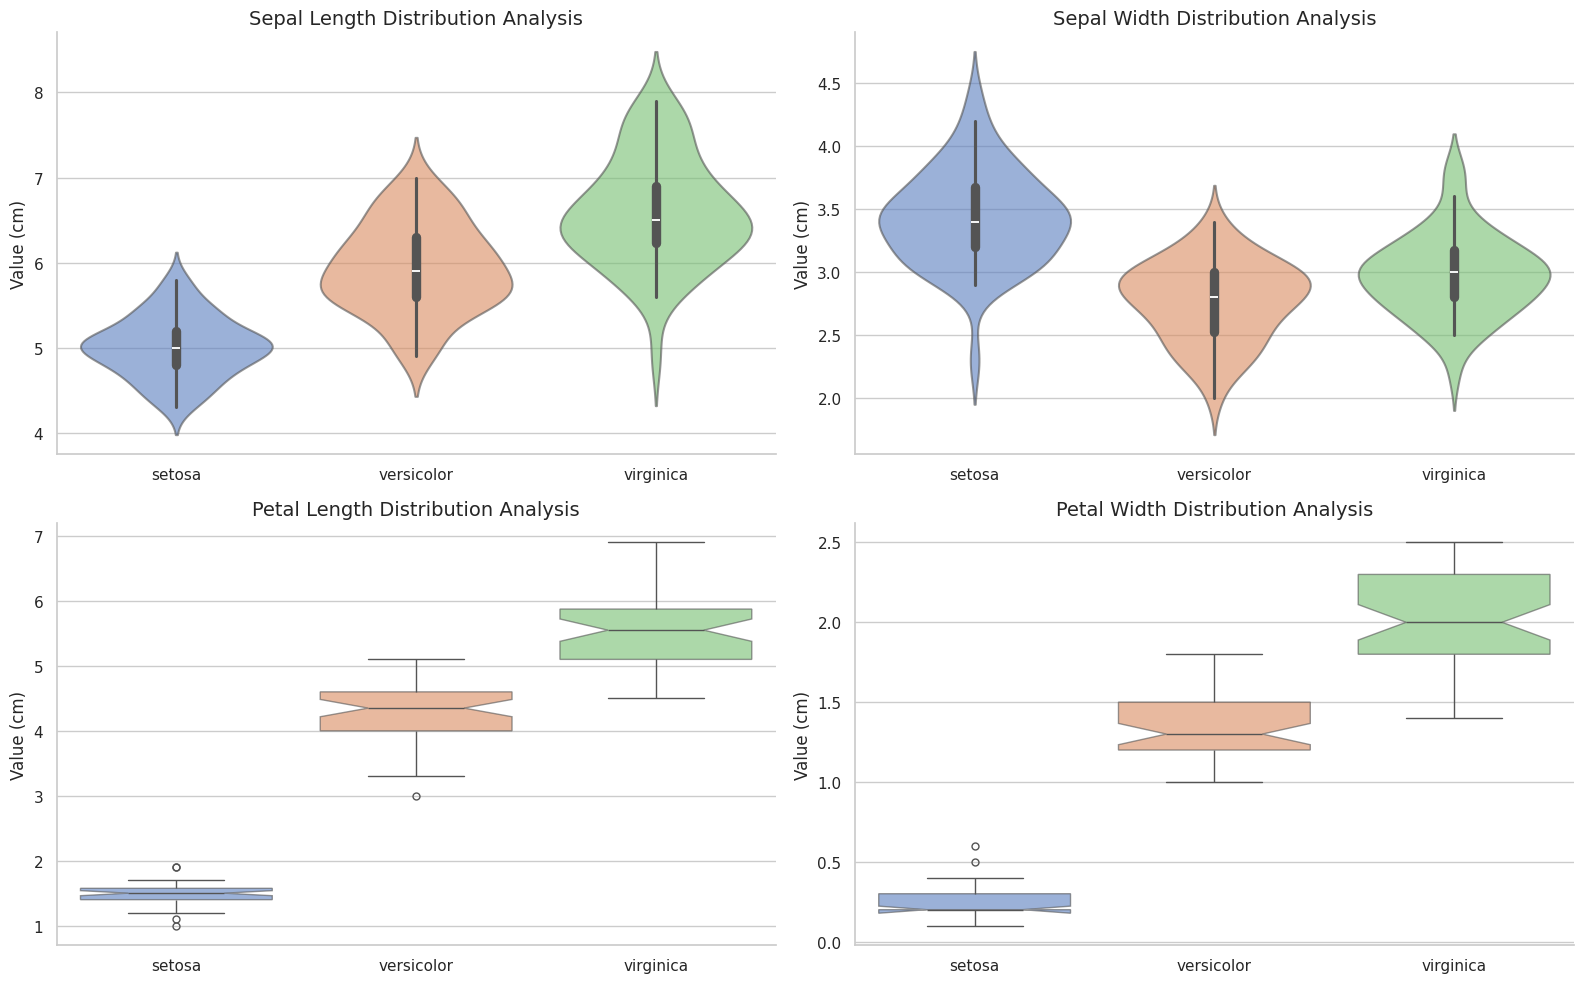

In [6]:
sns.set_theme(style="whitegrid")

plt.figure(figsize=(16, 10))

for i, feature in enumerate(features):
    plt.subplot(2, 2, i + 1)

    if i < 2:
        sns.violinplot(
            data=df,
            hue="species",
            x="species",
            y=feature,
            palette="muted",
            inner="box",
            linewidth=1.5,
            legend=False,
            alpha=0.6
        )
    else:
        sns.boxplot(
            data=df,
            hue="species",
            x="species",
            y=feature,
            palette="muted",
            notch=True,
            fliersize=5,
            legend=False,
            boxprops=dict(alpha=0.6)
        )

    plt.title(f"{feature.replace('_', ' ').title()} Distribution Analysis", fontsize=14)
    plt.xlabel("")
    plt.ylabel("Value (cm)", fontsize=12)
    sns.despine(left=False, bottom=False)

plt.tight_layout()
plt.show()

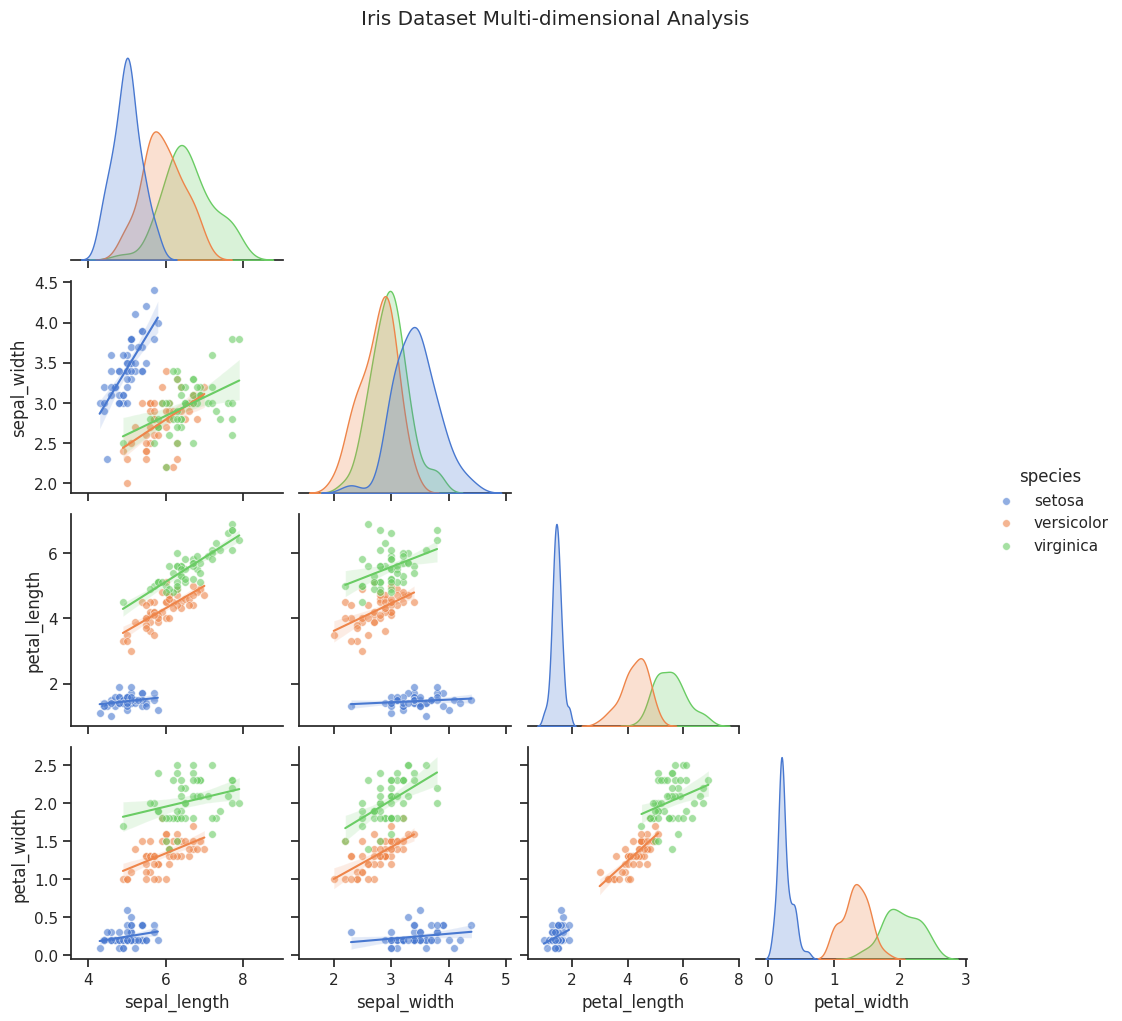

In [7]:
sns.set_style("ticks")

sns.pairplot(
    data=df,
    hue="species",
    kind="reg",
    diag_kind="kde",
    palette="muted",
    corner=True,
    plot_kws={
        "scatter_kws": {
          "alpha": 0.6,
          "s": 30,
          "edgecolor": "white",
          "linewidths": 0.5
        },
        "line_kws": {"linewidth": 1.5}
    }
)

plt.suptitle("Iris Dataset Multi-dimensional Analysis", y=1.02)
plt.show()

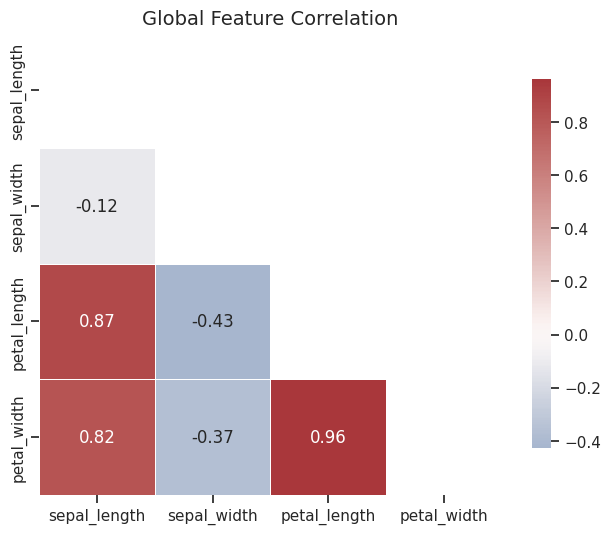

In [8]:
correlation_matrix = df.drop(columns="species").corr()

mask = np.triu(np.ones_like(correlation_matrix, dtype=bool))

plt.figure(figsize=(8, 6))

sns.heatmap(
    correlation_matrix,
    mask=mask,
    annot=True,
    cmap="vlag",
    center=0,
    fmt=".2f",
    linewidths=0.5,
    square=True,
    cbar_kws={"shrink": .8}
)

plt.title("Global Feature Correlation", fontsize=14)
plt.show()

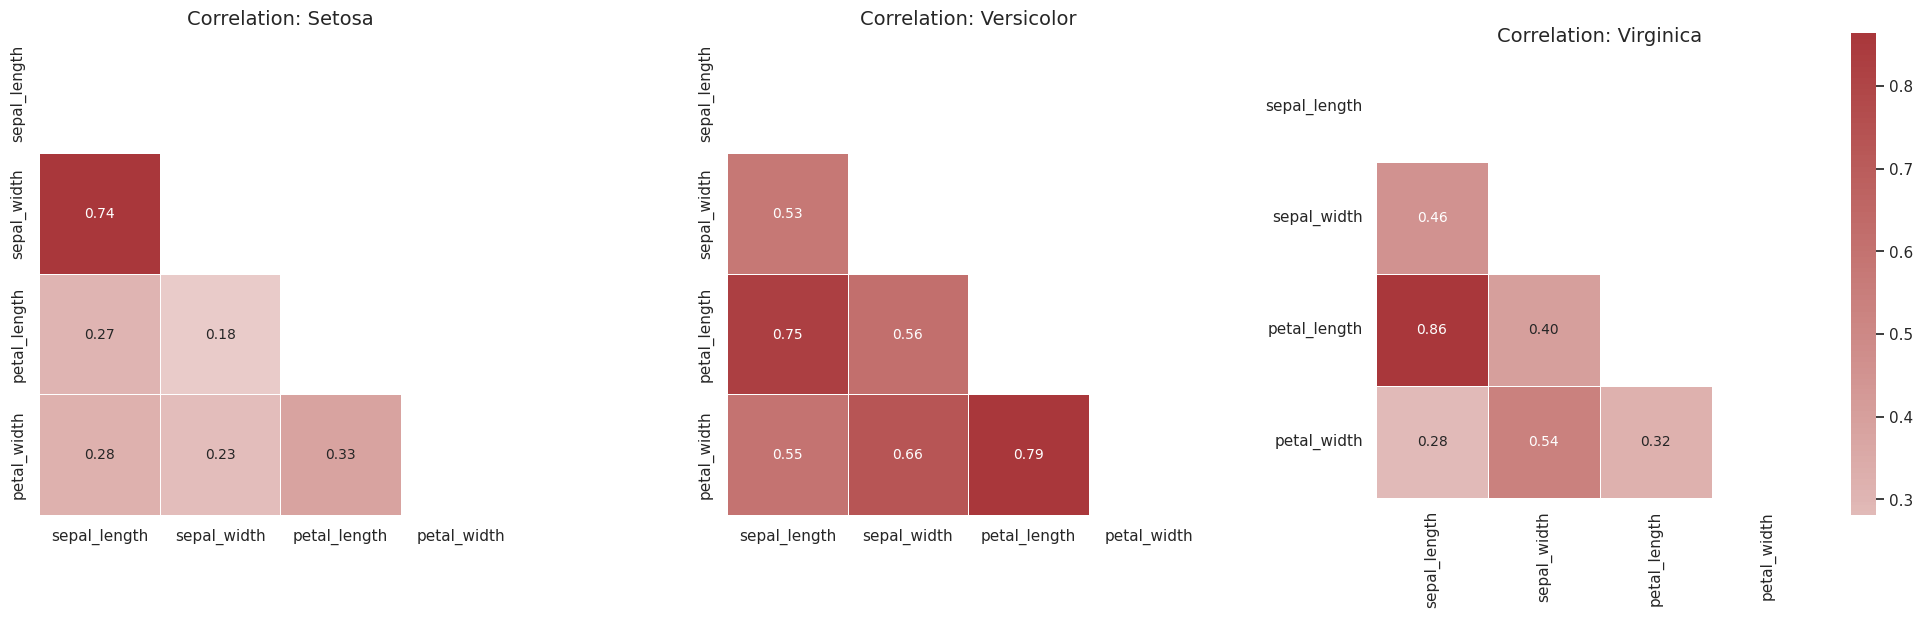

In [9]:
sns.set_theme(style="white")
fig, axes = plt.subplots(1, 3, figsize=(20, 6))

for i, spec in enumerate(species):
    spec_df = df[df['species'] == spec].drop(columns="species")
    corr = spec_df.corr()

    mask = np.triu(np.ones_like(corr, dtype=bool))

    sns.heatmap(corr,
                mask=mask,
                annot=True,
                fmt=".2f",
                cmap="vlag",
                center=0,
                ax=axes[i],
                cbar=(i == 2),
                square=True,
                linewidths=.5,
                annot_kws={"size": 10})

    axes[i].set_title(f"Correlation: {spec.title()}", fontsize=14)

plt.tight_layout()
plt.show()

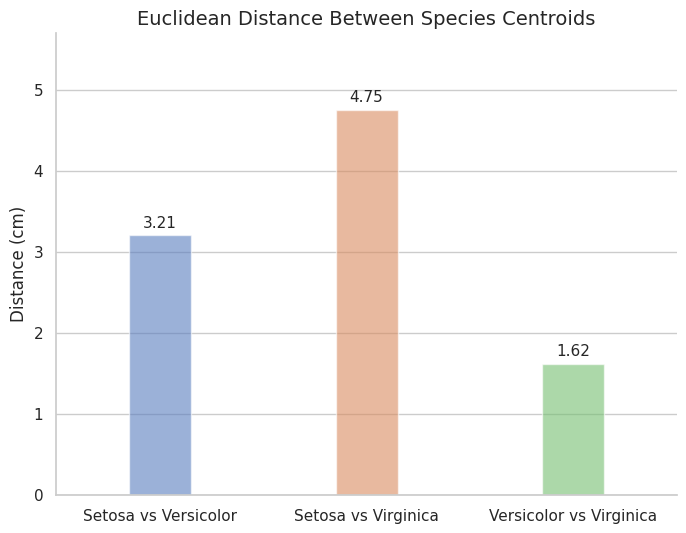

In [10]:
centroids = df.groupby("species")[features].mean()
set_vec = centroids.loc["setosa"].values
ver_vec = centroids.loc["versicolor"].values
vir_vec = centroids.loc["virginica"].values

dist_data = {
    "Comparison": ["Setosa vs Versicolor", "Setosa vs Virginica", "Versicolor vs Virginica"],
    "Distance": [
        np.linalg.norm(set_vec - ver_vec),
        np.linalg.norm(set_vec - vir_vec),
        np.linalg.norm(ver_vec - vir_vec)
    ]
}
dist_df = pd.DataFrame(dist_data)

sns.set_theme(style="whitegrid")
plt.figure(figsize=(8, 6))

ax = sns.barplot(
    data=dist_df,
    x="Comparison",
    y="Distance",
    palette="muted",
    alpha=0.6,
    width=0.3,
    hue="Comparison",
    legend=False
)

for p in ax.patches:
    ax.annotate(f'{p.get_height():.2f}',
                (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center',
                fontsize=11,
                xytext=(0, 9),
                textcoords='offset points')

plt.title("Euclidean Distance Between Species Centroids", fontsize=14)
plt.xlabel("")
plt.ylabel("Distance (cm)", fontsize=12)
plt.ylim(0, dist_df["Distance"].max() * 1.2)

sns.despine(left=False, bottom=False)
plt.show()

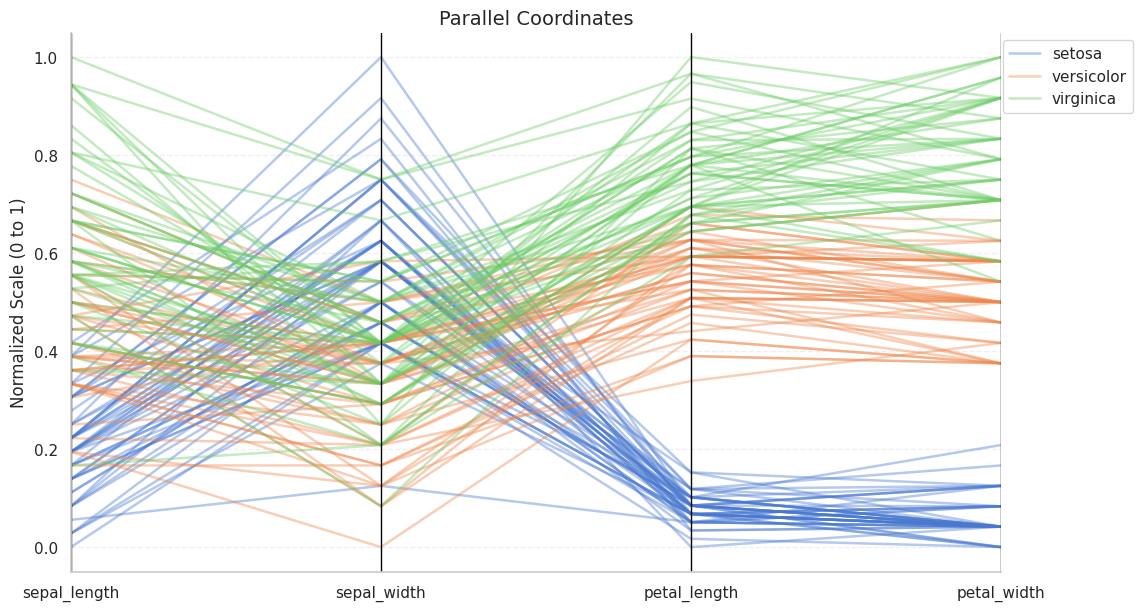

In [11]:
df_norm = df.copy()
for feature in features:
    df_norm[feature] = (df[feature] - df[feature].min()) / (df[feature].max() - df[feature].min())

my_palette = sns.color_palette("muted", n_colors=3)

plt.figure(figsize=(12, 7))

parallel_coordinates(
    df_norm,
    'species',
    color=my_palette,
    alpha=0.4,
    linewidth=1.8,
    axvlines=True
)

plt.title("Parallel Coordinates", fontsize=14)
plt.ylabel("Normalized Scale (0 to 1)", fontsize=12)
plt.legend(loc='upper right', bbox_to_anchor=(1.15, 1))
plt.grid(axis='y', linestyle='--', alpha=0.3)

sns.despine(left=False, bottom=False)

plt.show()

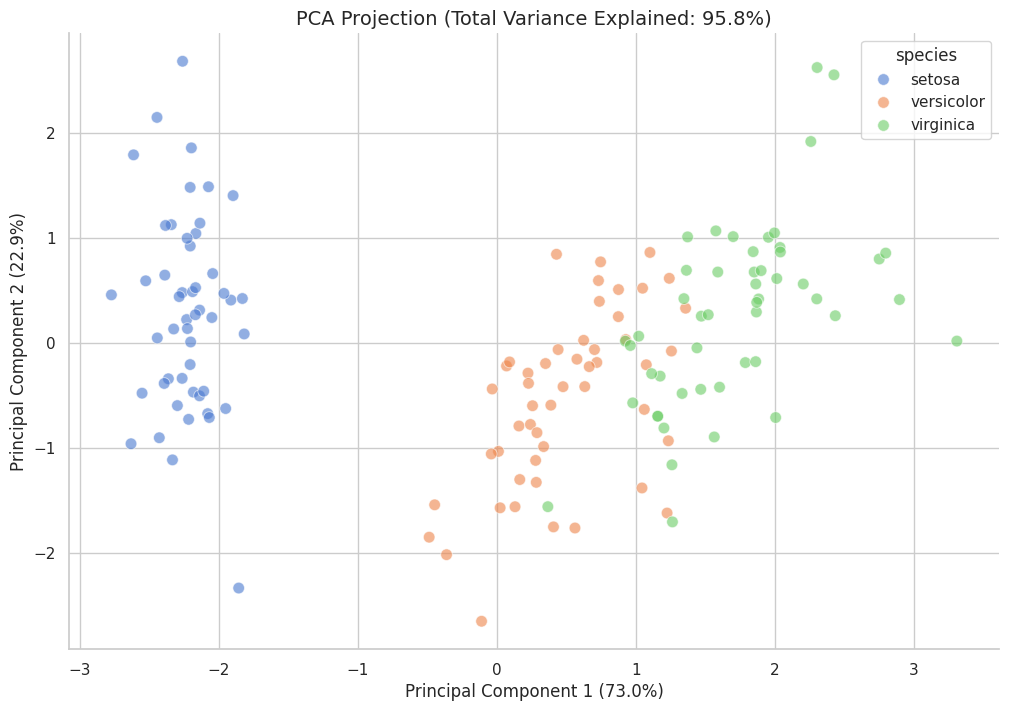

In [14]:
scaler = StandardScaler()
features_scaled = scaler.fit_transform(df[features])

pca = PCA(n_components=2)
pca_results = pca.fit_transform(features_scaled)

df_pca = pd.DataFrame(data=pca_results, columns=['PC1', 'PC2'])
df_pca['species'] = df['species']

var_ratio = pca.explained_variance_ratio_

sns.set_theme(style="whitegrid")
plt.figure(figsize=(12, 8))

sns.scatterplot(
    data=df_pca,
    x='PC1',
    y='PC2',
    hue='species',
    palette="muted",
    alpha=0.6,
    s=70,
    edgecolor='white'
)

plt.title(f"PCA Projection (Total Variance Explained: {sum(var_ratio)*100:.1f}%)", fontsize=14)
plt.xlabel(f"Principal Component 1 ({var_ratio[0]*100:.1f}%)", fontsize=12)
plt.ylabel(f"Principal Component 2 ({var_ratio[1]*100:.1f}%)", fontsize=12)

sns.despine()
plt.show()

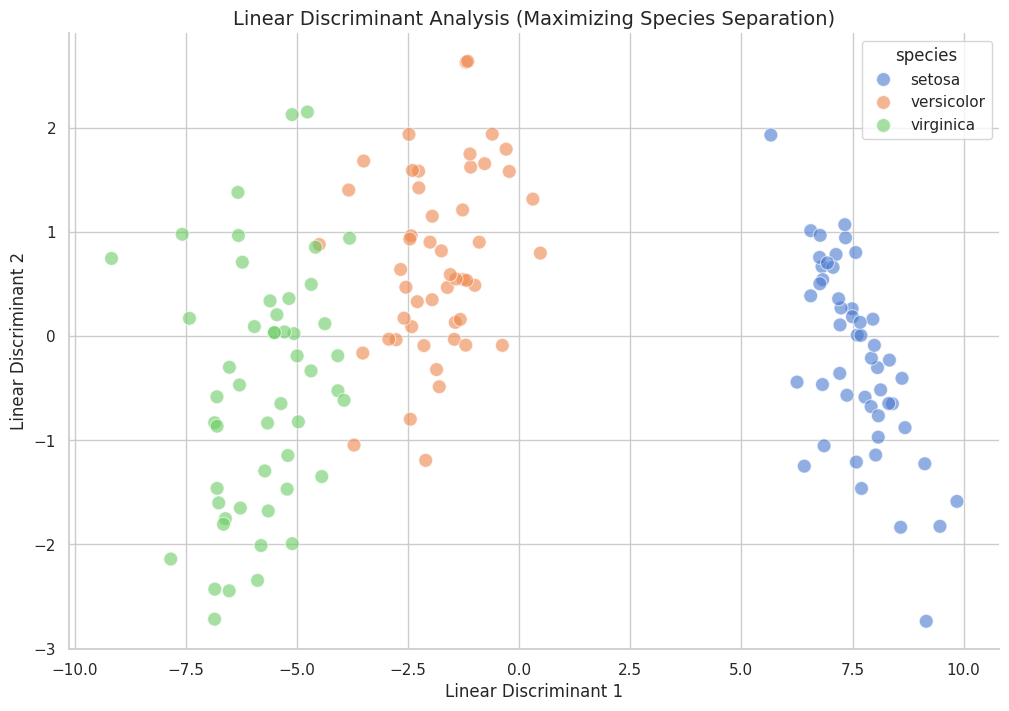

In [18]:
lda = LinearDiscriminantAnalysis(n_components=2)
lda_results = lda.fit_transform(features_scaled, df['species'])

df_lda = pd.DataFrame(data=lda_results, columns=['LD1', 'LD2'])
df_lda['species'] = df['species']

plt.figure(figsize=(12, 8))

sns.scatterplot(
    data=df_lda,
    x='LD1',
    y='LD2',
    hue='species',
    palette="muted",
    alpha=0.6,
    s=100,
    edgecolor='white'
)

plt.title("Linear Discriminant Analysis (Maximizing Species Separation)", fontsize=14)
plt.xlabel("Linear Discriminant 1", fontsize=12)
plt.ylabel("Linear Discriminant 2", fontsize=12)

sns.despine()
plt.show()

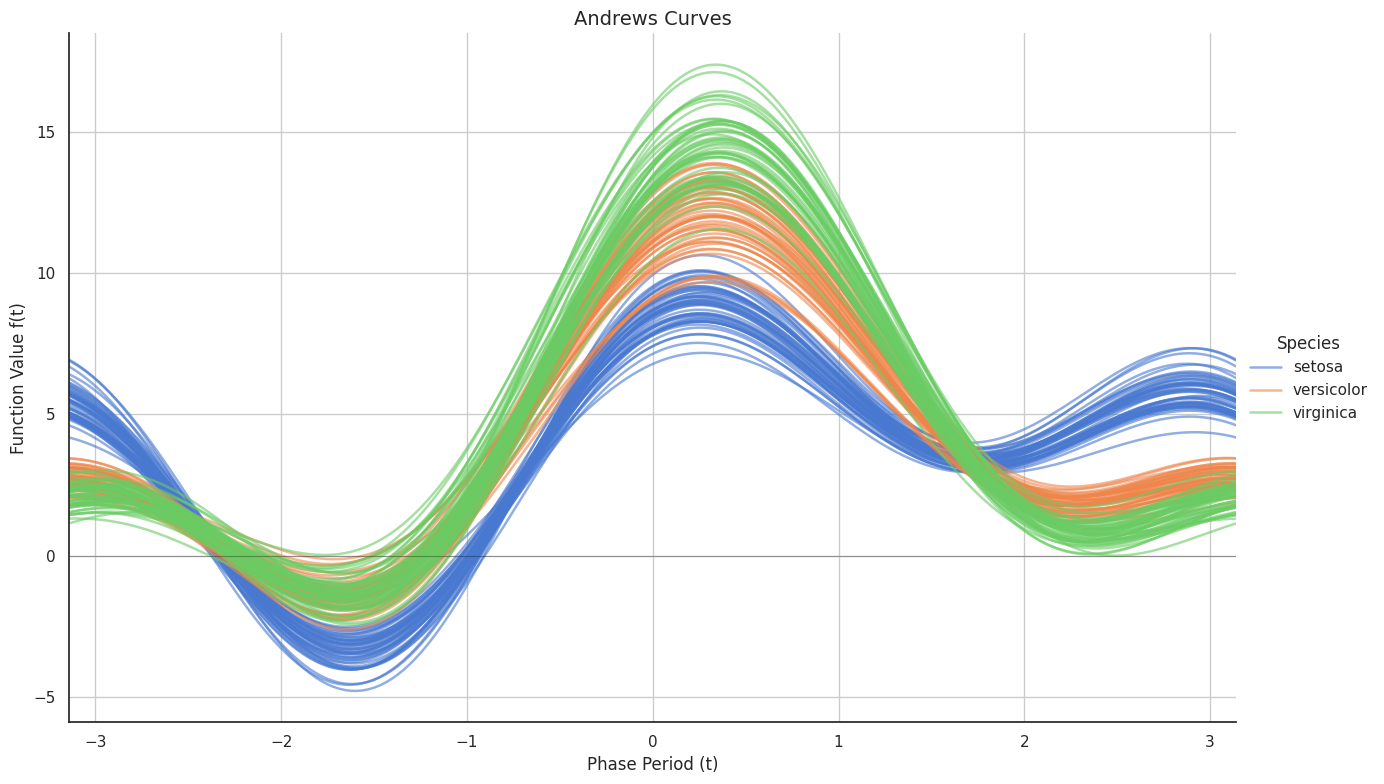

In [21]:
sns.set_theme(style="white")

plt.figure(figsize=(14, 8))

andrews_curves(
    df,
    'species',
    color=my_palette,
    linewidth=1.8,
    alpha=0.6
)

plt.title("Andrews Curves", fontsize=14)

plt.xlabel("Phase Period (t)", fontsize=12)
plt.ylabel("Function Value f(t)", fontsize=12)

plt.legend(title="Species", loc='center left', bbox_to_anchor=(1, 0.5), frameon=False)

plt.axhline(0, color='black', linewidth=0.8, alpha=.3)

sns.despine()

plt.tight_layout()
plt.show()